In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
engine.execute('SELECT * FROM Measurement').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0),
 (11, 'USC00519397', '2010-01-12', 0.0, 61.0),
 (12, 'USC00519397', '2010-01-14', 0.0, 66.0),
 (13, 'USC00519397', '2010-01-15', 0.0, 65.0),
 (14, 'USC00519397', '2010-01-16', 0.0, 68.0),
 (15, 'USC00519397', '2010-01-17', 0.0, 64.0),
 (16, 'USC00519397', '2010-01-18', 0.0, 72.0),
 (17, 'USC00519397', '2010-01-19', 0.0, 66.0),
 (18, 'USC00519397', '2010-01-20', 0.0, 66.0),
 (19, 'USC00519397', '2010-01-21', 0.0, 69.0),
 (20, 'USC00519397', '2010-01-22', 0.0, 67.0),
 (21, 'USC00519397', '2010-01-23', 0.0, 67.0),
 (22, 'USC00519397

In [12]:
latest_date = engine.execute('SELECT date FROM Measurement where date > 2017-01-01').fetchall()
latest_date

[('2015-01-01',),
 ('2015-01-02',),
 ('2015-01-03',),
 ('2015-01-04',),
 ('2015-01-05',),
 ('2015-01-06',),
 ('2015-01-07',),
 ('2015-01-08',),
 ('2015-01-09',),
 ('2015-01-10',),
 ('2015-01-11',),
 ('2015-01-12',),
 ('2015-01-13',),
 ('2015-01-14',),
 ('2015-01-15',),
 ('2015-01-16',),
 ('2015-01-17',),
 ('2015-01-18',),
 ('2015-01-19',),
 ('2015-01-20',),
 ('2015-01-21',),
 ('2015-01-22',),
 ('2015-01-23',),
 ('2015-01-24',),
 ('2015-01-25',),
 ('2015-01-26',),
 ('2015-01-27',),
 ('2015-01-28',),
 ('2015-01-29',),
 ('2015-01-30',),
 ('2015-01-31',),
 ('2015-02-01',),
 ('2015-02-02',),
 ('2015-02-03',),
 ('2015-02-04',),
 ('2015-02-05',),
 ('2015-02-06',),
 ('2015-02-07',),
 ('2015-02-08',),
 ('2015-02-09',),
 ('2015-02-10',),
 ('2015-02-11',),
 ('2015-02-12',),
 ('2015-02-13',),
 ('2015-02-14',),
 ('2015-02-15',),
 ('2015-02-16',),
 ('2015-02-17',),
 ('2015-02-18',),
 ('2015-02-19',),
 ('2015-02-20',),
 ('2015-02-21',),
 ('2015-02-22',),
 ('2015-02-23',),
 ('2015-02-24',),
 ('2015-02

# Exploratory Climate Analysis

In [33]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
precip_analysis = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= "2016-10-2").\
    filter(Measurement.date <= "2017-10-1").all()
    
    
# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column
precip_df = pd.DataFrame(precip_analysis)  
# Sort the dataframe by date
precip_df.head()
# Use Pandas Plotting with Matplotlib to plot the data


date  prcp
0  2016-10-20  0.00
1  2016-10-21  0.05
2  2016-10-22  0.15
3  2016-10-23  0.01
4  2016-10-24  0.00

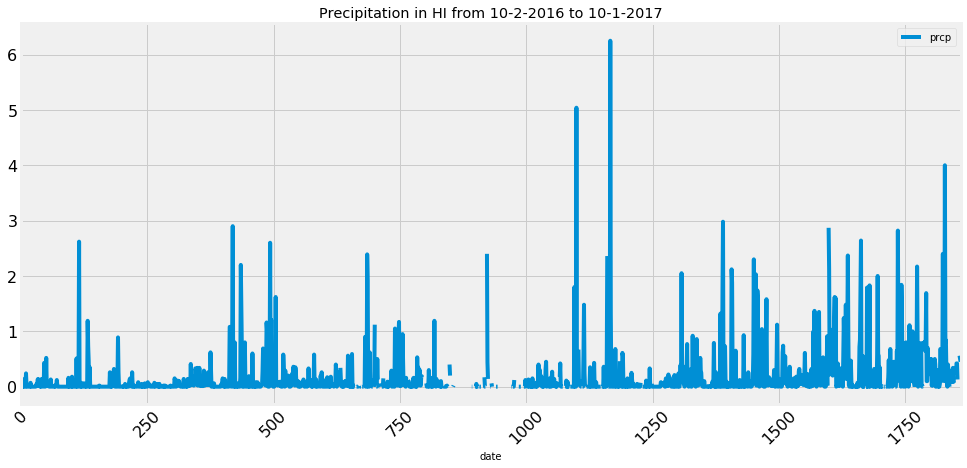

In [37]:
precip_df.plot(figsize=(15, 7),                                              # plots the data
               sort_columns=True, 
               rot=45, 
               use_index=True, 
               title='Precipitation in HI from 10-2-2016 to 10-1-2017', 
               legend=True,
               fontsize=16,
               grid=True
              )

plt.xlabel('date', fontsize=10)
plt.show()

In [38]:
precip_df.describe()       

prcp
count  1685.000000
mean      0.165062
std       0.428284
min       0.000000
25%       0.000000
50%       0.010000
75%       0.120000
max       6.250000

In [39]:
station_count = session.query(Station.id).count()
print(f'There are {station_count} weather stations in HI')

There are 9 weather stations in HI


In [43]:
station_activity = session.query(Measurement.station, Station.name, func.count(Measurement.tobs)).\
filter(Measurement.station == Station.station).group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc()).all()
station_activity   

[('USC00519281', 'WAIHEE 837.5, HI US', 2772),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 2724),
 ('USC00513117', 'KANEOHE 838.1, HI US', 2709),
 ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 2669),
 ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 2612),
 ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 2202),
 ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 1979),
 ('USC00517948', 'PEARL CITY, HI US', 1372),
 ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 511)]

In [44]:
station_activity[0]

('USC00519281', 'WAIHEE 837.5, HI US', 2772)

In [45]:
for row in reversed(station_activity):                                     
    most_active_station=row.station
    most_active_name=str(row.name)

In [49]:
most_active_station_tobs = session.query(Measurement.tobs).\
filter(Measurement.station == most_active_station, Measurement.station == Station.station,\
       Measurement.date >="2016-10-2", Measurement.date <="2017-10-1").all()
most_active_station_tobs

[(78.0),
 (78.0),
 (77.0),
 (74.0),
 (75.0),
 (76.0),
 (73.0),
 (76.0),
 (74.0),
 (77.0),
 (76.0),
 (76.0),
 (74.0),
 (75.0),
 (75.0),
 (75.0),
 (75.0),
 (71.0),
 (63.0),
 (70.0),
 (68.0),
 (67.0),
 (77.0),
 (74.0),
 (77.0),
 (76.0),
 (76.0),
 (75.0),
 (76.0),
 (75.0),
 (73.0),
 (75.0),
 (73.0),
 (75.0),
 (74.0),
 (75.0),
 (74.0),
 (75.0),
 (73.0),
 (75.0),
 (73.0),
 (73.0),
 (74.0),
 (70.0),
 (72.0),
 (70.0),
 (67.0),
 (67.0),
 (69.0),
 (70.0),
 (68.0),
 (69.0),
 (69.0),
 (66.0),
 (65.0),
 (68.0),
 (62.0),
 (75.0),
 (70.0),
 (69.0),
 (76.0),
 (76.0),
 (74.0),
 (73.0),
 (71.0),
 (74.0),
 (74.0),
 (72.0),
 (71.0),
 (72.0),
 (74.0),
 (69.0),
 (67.0),
 (72.0),
 (70.0),
 (64.0),
 (63.0),
 (63.0),
 (62.0),
 (70.0),
 (70.0),
 (62.0),
 (62.0),
 (63.0),
 (65.0),
 (69.0),
 (77.0),
 (70.0),
 (74.0),
 (69.0),
 (72.0),
 (71.0),
 (69.0),
 (71.0),
 (71.0),
 (72.0),
 (72.0),
 (69.0),
 (70.0),
 (66.0),
 (65.0),
 (69.0),
 (68.0),
 (68.0),
 (68.0),
 (59.0),
 (60.0),
 (70.0),
 (73.0),
 (75.0),
 (64.0),
 

In [51]:
temperatures = [temp[0] for temp in most_active_station_tobs]
temperatures

[78.0,
 78.0,
 77.0,
 74.0,
 75.0,
 76.0,
 73.0,
 76.0,
 74.0,
 77.0,
 76.0,
 76.0,
 74.0,
 75.0,
 75.0,
 75.0,
 75.0,
 71.0,
 63.0,
 70.0,
 68.0,
 67.0,
 77.0,
 74.0,
 77.0,
 76.0,
 76.0,
 75.0,
 76.0,
 75.0,
 73.0,
 75.0,
 73.0,
 75.0,
 74.0,
 75.0,
 74.0,
 75.0,
 73.0,
 75.0,
 73.0,
 73.0,
 74.0,
 70.0,
 72.0,
 70.0,
 67.0,
 67.0,
 69.0,
 70.0,
 68.0,
 69.0,
 69.0,
 66.0,
 65.0,
 68.0,
 62.0,
 75.0,
 70.0,
 69.0,
 76.0,
 76.0,
 74.0,
 73.0,
 71.0,
 74.0,
 74.0,
 72.0,
 71.0,
 72.0,
 74.0,
 69.0,
 67.0,
 72.0,
 70.0,
 64.0,
 63.0,
 63.0,
 62.0,
 70.0,
 70.0,
 62.0,
 62.0,
 63.0,
 65.0,
 69.0,
 77.0,
 70.0,
 74.0,
 69.0,
 72.0,
 71.0,
 69.0,
 71.0,
 71.0,
 72.0,
 72.0,
 69.0,
 70.0,
 66.0,
 65.0,
 69.0,
 68.0,
 68.0,
 68.0,
 59.0,
 60.0,
 70.0,
 73.0,
 75.0,
 64.0,
 59.0,
 59.0,
 62.0,
 68.0,
 70.0,
 73.0,
 79.0,
 75.0,
 65.0,
 70.0,
 74.0,
 70.0,
 70.0,
 71.0,
 71.0,
 71.0,
 69.0,
 61.0,
 67.0,
 65.0,
 72.0,
 71.0,
 73.0,
 72.0,
 77.0,
 73.0,
 67.0,
 62.0,
 64.0,
 67.0,
 66.0,
 81.0,

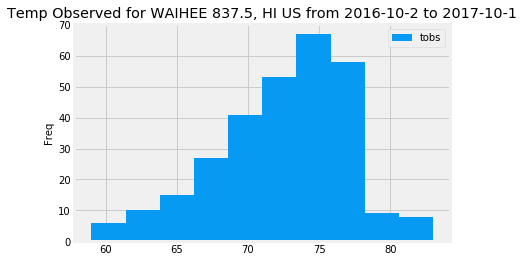

In [54]:
plt.hist(temperatures, bins=10, color='xkcd:azure')                          
plt.title("Temp Observed for %s from 2016-10-2 to 2017-10-1" % (most_active_name))
plt.ylabel('Freq', fontsize=10)
labels = ['tobs']
plt.legend(labels)
plt.show()

In [74]:
def calc_temps(start, end):
    temp_list = []
    query = session.query(Measurement.tobs).filter(Measurement.date>=start, Measurement.date<=end).all()
    temperatures = [temp[0] for temp in query]
    temp_list.append(np.mean(temperatures))
    temp_list.append(min(temperatures))
    temp_list.append(max(temperatures))
    
    return temp_list

In [13]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?


[(54.0, 85.0, 71.66378066378067)]

In [1]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


![precipitation](Images/station-histogram.png)

In [57]:
def calc_temps(start, end):
    temp_list = []
    query = session.query(Measurement.tobs).filter(Measurement.date>=start, Measurement.date<=end).all()
    temperatures = [temp[0] for temp in query]
    temp_list.append(np.mean(temperatures))
    temp_list.append(min(temperatures))
    temp_list.append(max(temperatures))
    
    return temp_list
calc_temps

<function __main__.calc_temps(start, end)>

In [58]:
def get_prev_year_date(target):
    try:
        xl = target.split('-')
        xc = (str(int(xl[0])-1)) + '-' + xl[1] + '-' + xl[2]
        return xc
    except:
        return target

In [68]:
trip_start_date = '2016-10-02'                                               
trip_end_date = '2017-10-1'
start_conv = get_prev_year_date(trip_start_date)
end_conv = get_prev_year_date(trip_end_date)
temp_list = calc_temps(start_conv, end_conv)
temp_list

[74.42375737152486, 56.0, 84.0]

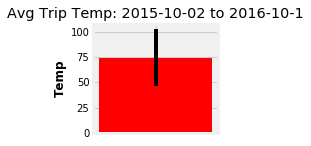

In [71]:
plt.figure(figsize=(2,2))
plt.bar(1, temp_list[0], yerr=(temp_list[2] - temp_list[1]), tick_label='', color='red')
plt.ylabel("Temp", weight="bold")
plt.title("Avg Trip Temp: %s to %s" % (start_conv, end_conv))
plt.show()

In [73]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
station_rainfall = session.query(Measurement.station, Station.name, func.sum(Measurement.prcp).label('precipitation')).\
filter(Measurement.station == Station.station, Measurement.date >= start_conv, Measurement.date <= end_conv).\
group_by(Measurement.station).order_by(func.sum(Measurement.prcp).desc()).all()
station_rainfall


[('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 175.79000000000002),
 ('USC00519281', 'WAIHEE 837.5, HI US', 95.02000000000001),
 ('USC00513117', 'KANEOHE 838.1, HI US', 67.92000000000004),
 ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 47.68999999999998),
 ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 41.30000000000001),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 20.259999999999987),
 ('USC00517948', 'PEARL CITY, HI US', 2.71),
 ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 0.95),
 ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 0.0)]

In [76]:
rainfall_df = pd.DataFrame(station_rainfall) 
rainfall_df

station                                    name  precipitation
0  USC00516128            MANOA LYON ARBO 785.2, HI US         175.79
1  USC00519281                     WAIHEE 837.5, HI US          95.02
2  USC00513117                    KANEOHE 838.1, HI US          67.92
3  USC00519523      WAIMANALO EXPERIMENTAL FARM, HI US          47.69
4  USC00514830  KUALOA RANCH HEADQUARTERS 886.9, HI US          41.30
5  USC00519397                    WAIKIKI 717.2, HI US          20.26
6  USC00517948                       PEARL CITY, HI US           2.71
7  USC00511918       HONOLULU OBSERVATORY 702.2, HI US           0.95
8  USC00518838              UPPER WAHIAWA 874.3, HI US           0.00

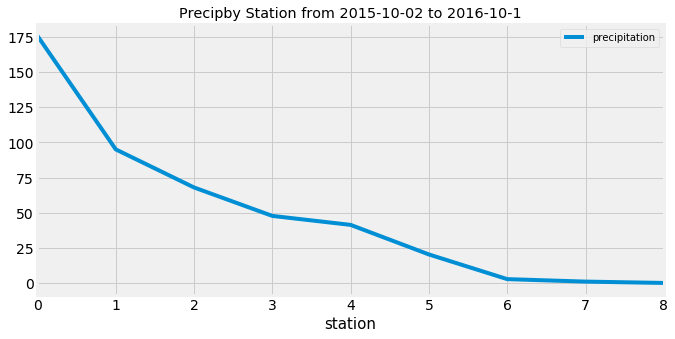

In [83]:
rainfall_df.plot(figsize=(10, 5),
               sort_columns=True, 
               use_index=True, 
               title='Precipby Station from %s to %s' % (start_conv, end_conv), 
               legend=True,
               fontsize=14,
               grid=True
              )

plt.xlabel('station', fontsize=15)
plt.show()

## Optional Challenge Assignment

In [20]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [21]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


[(62.0, 69.15384615384616, 77.0),
 (60.0, 69.39622641509433, 77.0),
 (62.0, 68.9090909090909, 77.0),
 (58.0, 70.0, 76.0),
 (56.0, 67.96428571428571, 76.0),
 (61.0, 68.96491228070175, 76.0),
 (57.0, 68.54385964912281, 76.0)]

In [22]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


tmin       tavg  tmax
date                             
2018-01-01  62.0  69.153846  77.0
2018-01-02  60.0  69.396226  77.0
2018-01-03  62.0  68.909091  77.0
2018-01-04  58.0  70.000000  76.0
2018-01-05  56.0  67.964286  76.0

<IPython.core.display.Javascript object>


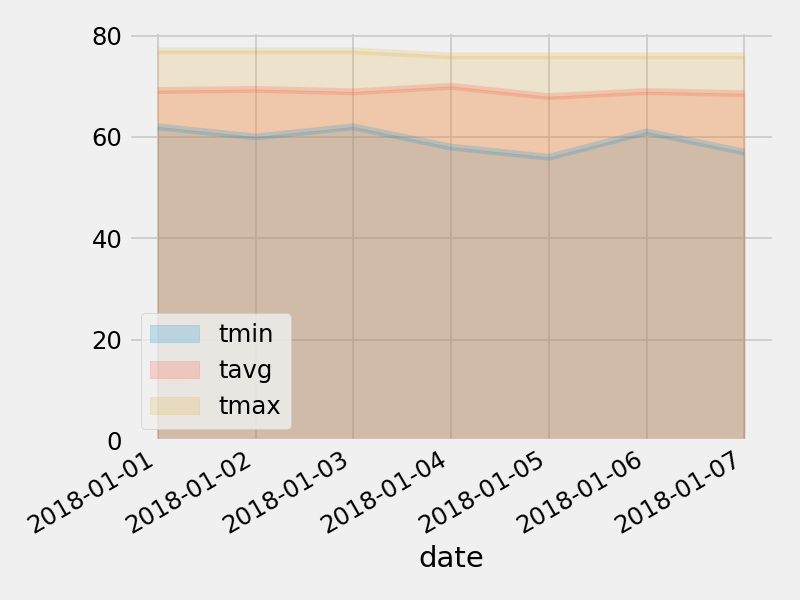

In [23]:
# Plot the daily normals as an area plot with `stacked=False`
